# Flair sentiment

In [2]:
# from flair.models import TextClassifier
# from flair.data import Sentence
import pandas as pd
import numpy as np
from tqdm.notebook import tnrange,tqdm
import matplotlib.pyplot as plt

In [10]:
# load tagger
classifier = TextClassifier.load('sentiment')

2020-11-05 12:38:58,150 loading file /home/joey/.flair/models/sentiment-en-mix-distillbert_3.1.pt


In [14]:
df = pd.read_csv('output6_triplets_names.csv', index_col=0)
df

,From,Sent,To,CC,Subject,Attachments,Importance,Body,textblob_sentiment,nltk_sentiment
0,"('cindy', 'dick', 'cynthia.dick@talgov.com')",2011-08-18 12:12:00,"[('fire', 'department', 'fire_department')]",[],[],[],[],['I recently came across this quote and reflec...,"[0.275, 0.39583333333333337]","[0.0, 0.149, 0.701, 0.149]"
1,"('mark', 'decarlo', 'mark.decarlo@talgov.com')",2011-08-20 03:44:00,"[('fire', 'department', 'fire_department')]",[],[],[],[],[''],"[0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]"
2,"('deborah', 'heiter', 'deborah.heiter@talgov.c...",2012-01-20 16:41:00,"[('bill', 'behenna', 'bill_behenna'), ('cathy'...",[],[],[],[],"['', 'Deborah L. Heiter', 'Administrative Spec...","[0.07253787878787879, 0.3424242424242424]","[0.9318, 0.0, 0.93, 0.07]"
3,"('beth', 'kirkland', 'bkirkland@taledc.com')",2012-01-23 09:32:00,"[('f496', 'l496', 'llaubscher@eflorida.com')]","[('f18020', 'l18020', 'brook.pace@deo.myflorid...",[],[],[],"['Louis,', 'Thank you for meeting with us in F...","[0.012500000000000011, 0.36944444444444446]","[0.9599, 0.021, 0.847, 0.132]"
4,"('vida', 'addison', 'vida.addison@talgov.com')",2012-02-07 15:19:00,"[(""gary yordon' no, they have not told me anyt...",[],[],[],[],"['Hello, Do you have a 4meline for when a deci...","[0.021875000000000006, 0.403125]","[0.8708, 0.0, 0.879, 0.121]"
...,...,...,...,...,...,...,...,...,...,...
21809,"('gina', 'fletcher', 'gfletcher@leonpa.org')",2017-09-26 11:12:00,"[('vince', 'long', 'longv@leoncountyfl.gov'), ...","[('f22301', 'l22301', 'rosss@leoncountyfl.gov'...",[],[],"[""High Good morning, everyone! I have been c...",[],"[0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]"
21810,"('alison', 'faris', 'alison.faris@talgov.com')",2017-09-26 11:20:00,"[('suzanne', 'hughes', 'suzanneh@floridarealto...","[('paige', 'carter-smith', 'paige.tallahasseed...",[],[],[],"['', 'Thanks for leqng us know about your plan...","[0.2333333333333333, 0.4000000000000001]","[0.9001, 0.0, 0.842, 0.158]"
21811,"('suzanne', 'hughes', 'suzanneh@floridarealtor...",2017-09-26 13:41:00,"[('alison', 'faris', 'afaris@comcast.net')]","[('paige', 'carter-smith', 'paige.tallahasseed...",[],[],[],"['', '', 'Great! And yes, wed love to let eve...","[0.625, 0.5166666666666667]","[0.9421, 0.0, 0.377, 0.623]"
21812,"('edward', 'kring', 'edward.kring@talgov.com')",2017-09-26 17:48:00,"[('suzanne', 'hughes', 'suzanneh@floridarealto...","[('paige', 'carter-smith', 'paige.tallahasseed...",[],[],[],"['', 'HI Suzanne I hope this nds you well. Pl...","[-0.75, 1.0]","[0.891, 0.0, 0.741, 0.259]"


In [56]:
s = Sentence('I have a dream.')

In [113]:
body = df['Body'].values.tolist()
text_length = []
processed_body = []
length = len(df)
for i in tnrange(length):
    body[i] = eval(body[i])
    b = ' '.join(body[i])
    b = b.strip()
    processed_body.append(b)
    if len(b) != 0:
        flair_sentence = Sentence(b)
        text_length.append(len(flair_sentence))
    else:
        text_length.append(0)
        

In [16]:
flair_sentiment = []
for i in tnrange(length):
    if len(processed_body[i]) != 0:
        sentence = Sentence(processed_body[i])
        classifier.predict(sentence)
        l = str(sentence.get_labels()[0])
        flair_sentiment.append(l)
    else:
        l = 'empty body'
        flair_sentiment.append(l)

In [17]:
df['flair_sentiment'] = flair_sentiment

# GCP sentiment api

In [18]:
# Imports the Google Cloud client library
from google.cloud import language_v1


# Instantiates a client
client = language_v1.LanguageServiceClient()


In [19]:
###### don't run this again

GCP_sentiment = []
for i in tnrange(length):
    text = processed_body[i]
    if len(text) != 0:
        document = language_v1.Document(content=text, type_=language_v1.Document.Type.PLAIN_TEXT)
        sentiment = client.analyze_sentiment(request={'document': document}).document_sentiment
        l = [sentiment.score, sentiment.magnitude]
        GCP_sentiment.append(l)
    else:
        l = [0, 0]
        GCP_sentiment.append(l)

In [123]:
# df = pd.read_csv('output7_new_sentiment.csv',index_col=0)

In [125]:
# GCP_sentiment = df['GCP_sentiment'].values.tolist()
# for i in range(length):
#     GCP_sentiment[i] = eval(GCP_sentiment[i])
GCP_sentiment = np.array(GCP_sentiment)
GCP_sentiment

array([[3.00000012e-01, 1.79999995e+00, 8.25158133e-05],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 2.79999995e+00, 1.28357933e-04],
       ...,
       [8.00000012e-01, 2.59999990e+00, 1.19189507e-04],
       [1.00000001e-01, 8.00000012e-01, 3.66736963e-05],
       [3.00000012e-01, 1.00000000e+00, 4.58421197e-05]])

In [126]:
for i in tnrange(length):
    text = processed_body[i]
    if len(text) != 0:
        GCP_sentiment[i,2] = GCP_sentiment[i,1]/text_length[i]
    else:
        GCP_sentiment[i,2] = 0

In [132]:
GCP_sentiment

array([[0.30000001, 1.79999995, 0.03      ],
       [0.        , 0.        , 0.        ],
       [0.        , 2.79999995, 0.00952381],
       ...,
       [0.80000001, 2.5999999 , 0.15294117],
       [0.1       , 0.80000001, 0.01454545],
       [0.30000001, 1.        , 0.03846154]])

In [136]:
df['GCP_sentiment'] = GCP_sentiment.tolist()

In [137]:
df

,From,Sent,To,CC,Subject,Attachments,Importance,Body,textblob_sentiment,nltk_sentiment,flair_sentiment,GCP_sentiment
0,"('cindy', 'dick', 'cynthia.dick@talgov.com')",2011-08-18 12:12:00,"[('fire', 'department', 'fire_department')]",[],[],[],[],['I recently came across this quote and reflec...,"[0.275, 0.39583333333333337]","[0.0, 0.149, 0.701, 0.149]",POSITIVE (0.9575),"[0.30000001192092896, 1.7999999523162842, 0.02..."
1,"('mark', 'decarlo', 'mark.decarlo@talgov.com')",2011-08-20 03:44:00,"[('fire', 'department', 'fire_department')]",[],[],[],[],[''],"[0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]",empty body,"[0.0, 0.0, 0.0]"
2,"('deborah', 'heiter', 'deborah.heiter@talgov.c...",2012-01-20 16:41:00,"[('bill', 'behenna', 'bill_behenna'), ('cathy'...",[],[],[],[],"['', 'Deborah L. Heiter', 'Administrative Spec...","[0.07253787878787879, 0.3424242424242424]","[0.9318, 0.0, 0.93, 0.07]",POSITIVE (0.8154),"[0.0, 2.799999952316284, 0.009523809361620015]"
3,"('beth', 'kirkland', 'bkirkland@taledc.com')",2012-01-23 09:32:00,"[('f496', 'l496', 'llaubscher@eflorida.com')]","[('f18020', 'l18020', 'brook.pace@deo.myflorid...",[],[],[],"['Louis,', 'Thank you for meeting with us in F...","[0.012500000000000011, 0.36944444444444446]","[0.9599, 0.021, 0.847, 0.132]",POSITIVE (0.9031),"[0.20000000298023224, 2.799999952316284, 0.010..."
4,"('vida', 'addison', 'vida.addison@talgov.com')",2012-02-07 15:19:00,"[(""gary yordon' no, they have not told me anyt...",[],[],[],[],"['Hello, Do you have a 4meline for when a deci...","[0.021875000000000006, 0.403125]","[0.8708, 0.0, 0.879, 0.121]",NEGATIVE (0.9894),"[0.0, 0.6000000238418579, 0.0052631581038759465]"
...,...,...,...,...,...,...,...,...,...,...,...,...
21809,"('gina', 'fletcher', 'gfletcher@leonpa.org')",2017-09-26 11:12:00,"[('vince', 'long', 'longv@leoncountyfl.gov'), ...","[('f22301', 'l22301', 'rosss@leoncountyfl.gov'...",[],[],"[""High Good morning, everyone! I have been c...",[],"[0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]",empty body,"[0.0, 0.0, 0.0]"
21810,"('alison', 'faris', 'alison.faris@talgov.com')",2017-09-26 11:20:00,"[('suzanne', 'hughes', 'suzanneh@floridarealto...","[('paige', 'carter-smith', 'paige.tallahasseed...",[],[],[],"['', 'Thanks for leqng us know about your plan...","[0.2333333333333333, 0.4000000000000001]","[0.9001, 0.0, 0.842, 0.158]",POSITIVE (0.9654),"[0.10000000149011612, 2.200000047683716, 0.028..."
21811,"('suzanne', 'hughes', 'suzanneh@floridarealtor...",2017-09-26 13:41:00,"[('alison', 'faris', 'afaris@comcast.net')]","[('paige', 'carter-smith', 'paige.tallahasseed...",[],[],[],"['', '', 'Great! And yes, wed love to let eve...","[0.625, 0.5166666666666667]","[0.9421, 0.0, 0.377, 0.623]",POSITIVE (0.9982),"[0.800000011920929, 2.5999999046325684, 0.1529..."
21812,"('edward', 'kring', 'edward.kring@talgov.com')",2017-09-26 17:48:00,"[('suzanne', 'hughes', 'suzanneh@floridarealto...","[('paige', 'carter-smith', 'paige.tallahasseed...",[],[],[],"['', 'HI Suzanne I hope this nds you well. Pl...","[-0.75, 1.0]","[0.891, 0.0, 0.741, 0.259]",POSITIVE (0.8982),"[0.10000000149011612, 0.800000011920929, 0.014..."


In [138]:
df.to_csv('output7_new_sentiment.csv')

In [139]:
textblob_sentiment = df['textblob_sentiment'].values.tolist()
for i in range(length):
    textblob_sentiment[i] = eval(textblob_sentiment[i])
textblob_sentiment = np.array(textblob_sentiment)

In [164]:
non_empty_idx = []
for i in range(length):
    if flair_sentiment[i] != 'empty body':
        non_empty_idx.append(i)
    

In [165]:
df_nonempty = df.iloc[non_empty_idx]

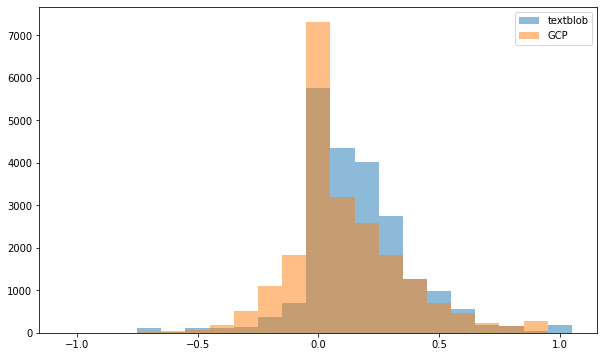

In [167]:
plt.figure(figsize=(10, 6))
plt.hist(textblob_sentiment[:,0], bins=21, range=(-1.05,1.05), alpha = 0.5, label= 'textblob')
plt.hist(GCP_sentiment[:,0], bins=21, range=(-1.05,1.05), alpha = 0.5, label= 'GCP')
plt.legend()
plt.show()

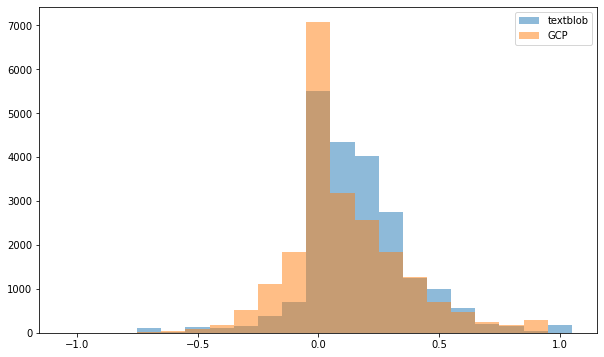

In [166]:
plt.figure(figsize=(10, 6))
plt.hist(textblob_sentiment[non_empty_idx,0], bins=21, range=(-1.05,1.05), alpha = 0.5, label= 'textblob')
plt.hist(GCP_sentiment[non_empty_idx,0], bins=21, range=(-1.05,1.05), alpha = 0.5, label= 'GCP')
plt.legend()
plt.show()

In [141]:
df['Sent'] = pd.to_datetime(df['Sent'])

In [142]:
year_list = df['Sent'].dt.year
month_list = df['Sent'].dt.month


In [145]:
GCP_sentiment_by_month=np.zeros((6,12,3))
GCP_sentiment_by_month_avg=np.zeros((6,12,3))
# GCP_sentiment_by_month_idxs=[]

email_counts_by_month=np.zeros((6,12))

for i in range(len(month_list)):
    year_idx = year_list[i]-2012
    month_idx = month_list[i]-1
    if GCP_sentiment[i,0] != 0 or GCP_sentiment[i,1] != 0:
        GCP_sentiment_by_month[year_idx, month_idx, :] += GCP_sentiment[i,:] 
        email_counts_by_month[year_idx, month_idx] += 1
for i in range(6):
    for j in range(12):
        if email_counts_by_month[i,j] != 0:
            GCP_sentiment_by_month_avg[i,j,:] = GCP_sentiment_by_month[i,j,:] / email_counts_by_month[i,j]    

In [147]:
GCP_polarity_by_year = []
GCP_subjectivity_by_year = []
GCP_subjectivity_normed_by_year = []

GCP_polarity_by_month = []
GCP_subjectivity_by_month = []
GCP_subjectivity_normed_by_month = []


for i in range(6):
    GCP_polarity_by_year.append([])
    GCP_subjectivity_by_year.append([])
    GCP_subjectivity_normed_by_year.append([])
    for j in range(12):
        GCP_polarity_by_month.append([])
        GCP_subjectivity_by_month.append([])
        GCP_subjectivity_normed_by_month.append([])
        
for i in range(length):
    year_idx = year_list[i]-2012
    month_idx = year_idx*12 + (month_list[i]-1)
    if year_idx >= 7 or year_idx<0:
        continue
    if GCP_sentiment[i,0] != 0 or GCP_sentiment[i,1] != 0:
        GCP_polarity_by_year[year_idx].append(GCP_sentiment[i,0])
        GCP_subjectivity_by_year[year_idx].append(GCP_sentiment[i,1])
        GCP_subjectivity_normed_by_year[year_idx].append(GCP_sentiment[i,2])
        GCP_polarity_by_month[month_idx].append(GCP_sentiment[i,0])
        GCP_subjectivity_by_month[month_idx].append(GCP_sentiment[i,1])
        GCP_subjectivity_normed_by_month[month_idx].append(GCP_sentiment[i,2])

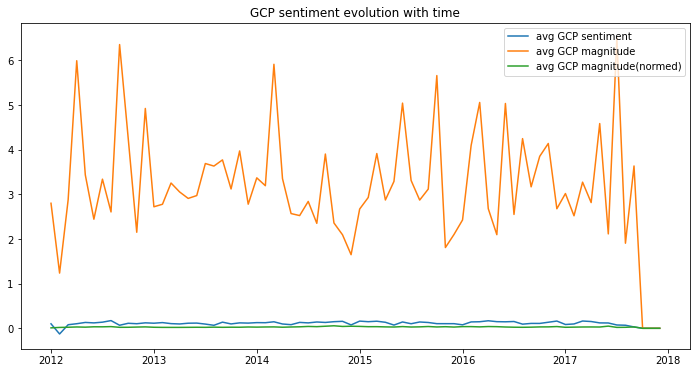

In [149]:
GCP_label = ['sentiment', 'magnitude', 'magnitude(normed)']
fig, ax = plt.subplots(figsize = (12,6))
for i in range(3):
    vec = GCP_sentiment_by_month_avg[:,:,i].reshape(-1)
    plt.plot(vec, label = 'avg GCP '+ GCP_label[i])


ax.set_xticks(np.linspace(0,12*6,7))
ax.set_xticklabels(['2012','2013','2014','2015','2016','2017','2018'])
plt.title('GCP sentiment evolution with time')
plt.legend()
plt.show()

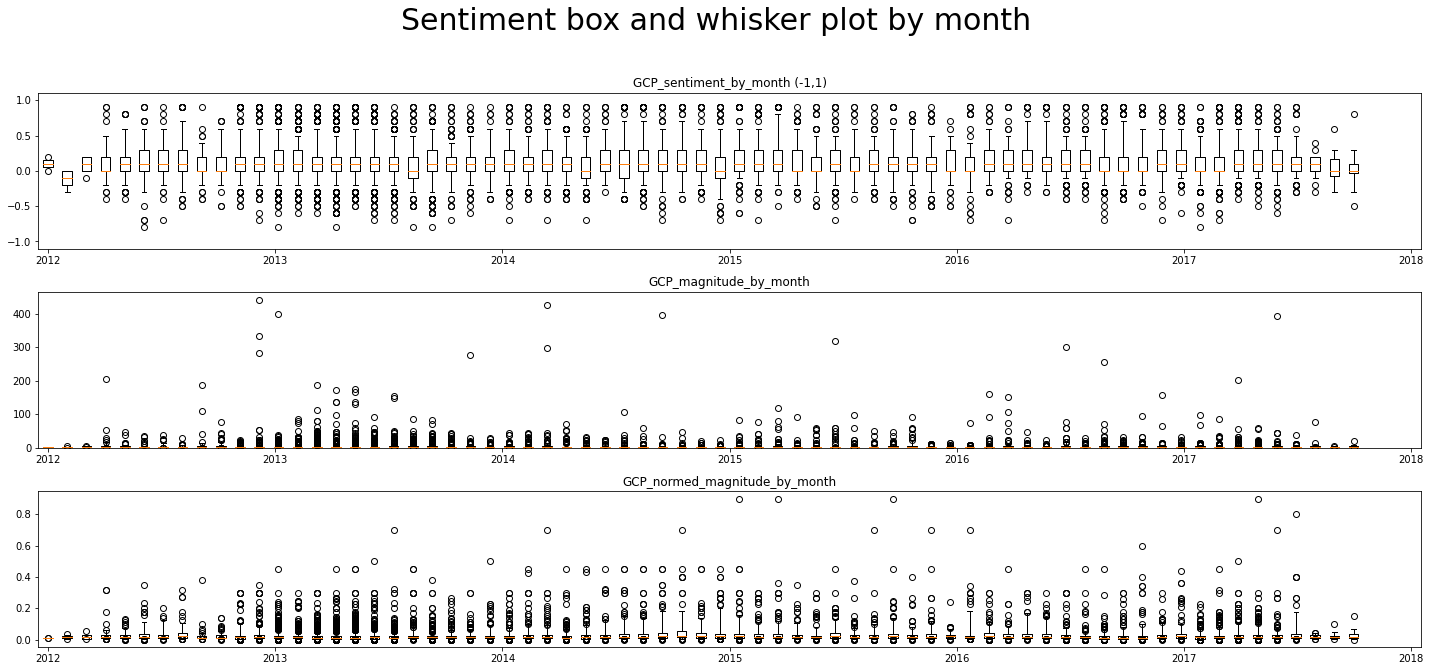

In [150]:
data_by_month = [GCP_polarity_by_month, GCP_subjectivity_by_month, GCP_subjectivity_normed_by_month]
labels = ['GCP_sentiment_by_month (-1,1)', 'GCP_magnitude_by_month', 'GCP_normed_magnitude_by_month']
plt.figure(figsize =(20, 9)) 
plt.suptitle('Sentiment box and whisker plot by month', fontsize =30, y = 1.03)
for i in range(3):# num of plots
    plt.subplot(3,1,i+1)
    ax = plt.gca()
    data = data_by_month[i]
    
#     mean = np.zeros(6) # num of year
#     std = np.zeros(6) # num of year
#     for j in range(6):
#         mean[j] = np.mean(data[j])
#         std[j] = np.std(data[j])
#     plt.errorbar(np.linspace(1,6,6), mean, std, fmt='-o')
    plt.boxplot(data, whis=(5,95)) 
    
    if i == 0:
        plt.ylim(-1.1,1.1)
    elif i == 1:
        plt.ylim(-0.1,)
    ax.set_xticks(np.linspace(1,6*12,7))
    ax.set_xticklabels(['2012','2013','2014','2015','2016','2017','2018'])
    plt.title(labels[i])
plt.tight_layout()
plt.show() 



/home/joey/anaconda3/envs/torch/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/joey/anaconda3/envs/torch/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/joey/anaconda3/envs/torch/lib/python3.8/site-packages/numpy/core/_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/joey/anaconda3/envs/torch/lib/python3.8/site-packages/numpy/core/_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/home/joey/anaconda3/envs/torch/lib/python3.8/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


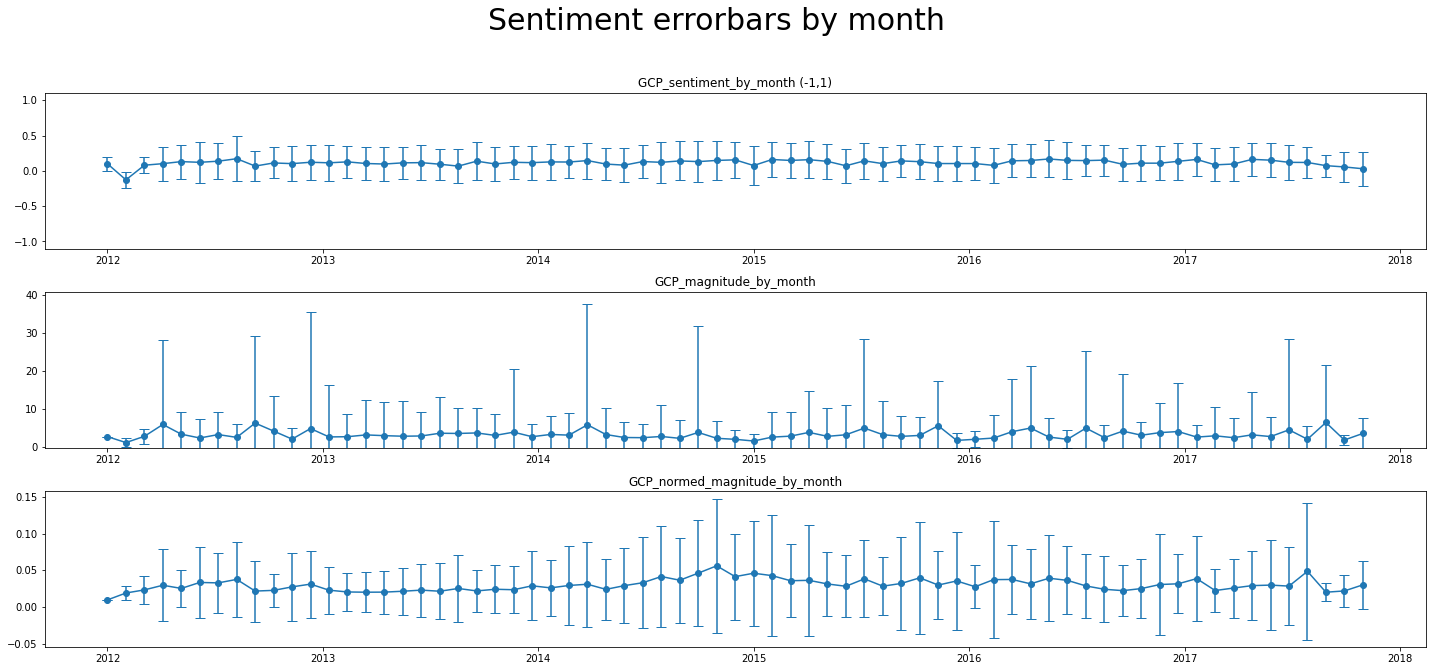

In [151]:
data_by_month = [GCP_polarity_by_month, GCP_subjectivity_by_month, GCP_subjectivity_normed_by_month]
labels = ['GCP_sentiment_by_month (-1,1)', 'GCP_magnitude_by_month', 'GCP_normed_magnitude_by_month']
plt.figure(figsize =(20, 9)) 
plt.suptitle('Sentiment errorbars by month', fontsize =30, y = 1.03)
for i in range(3):# num of plots
    plt.subplot(3,1,i+1)
    ax = plt.gca()
    data = data_by_month[i]
    mean = np.zeros(len(data)) # num of month
    std = np.zeros(len(data)) # num of month
    for j in range(len(data)):
        mean[j] = np.mean(data[j])
        std[j] = np.std(data[j])
    plt.errorbar(np.linspace(1,len(data)+1,len(data)), mean, std, capsize=5, fmt='-o')
#     plt.boxplot(data, whis=(5,95)) 
    
    if i == 0:
        plt.ylim(-1.1,1.1)
    elif i == 1:
        plt.ylim(-0.1,)
    ax.set_xticks(np.linspace(1,6*12,7))
    ax.set_xticklabels(['2012','2013','2014','2015','2016','2017','2018'])
    plt.title(labels[i])
plt.tight_layout()
plt.show() 



In [9]:
df = pd.read_csv('output7_new_sentiment.csv', index_col=0)
GCP_sentiment = df['GCP_sentiment'].values.tolist()
length = len(df)
for i in range(length):
    GCP_sentiment[i] = eval(GCP_sentiment[i])
GCP_sentiment = np.array(GCP_sentiment)

In [10]:
GCP_sentiment

array([[0.30000001, 1.79999995, 0.03      ],
       [0.        , 0.        , 0.        ],
       [0.        , 2.79999995, 0.00952381],
       ...,
       [0.80000001, 2.5999999 , 0.15294117],
       [0.1       , 0.80000001, 0.01454545],
       [0.30000001, 1.        , 0.03846154]])

In [11]:
abnormal_idx = []
for i in range(length):
    if GCP_sentiment[i,2] > 0.6:
        abnormal_idx.append(i)

In [12]:
df_abnormal = df.iloc[abnormal_idx]
df_abnormal = df_abnormal.reset_index(drop=True)
df_abnormal

,From,Sent,To,CC,Subject,Attachments,Importance,Body,textblob_sentiment,nltk_sentiment,flair_sentiment,GCP_sentiment
0,"('angela', 'hendrieth', 'angela.hendrieth@talg...",2013-07-17 12:45:00,"[('kim', 'rivers', 'kim@inkbridge.com')]",[],[],[],[],['ok'],"[0.5, 0.5]","[0.296, 0.0, 0.0, 1.0]",POSITIVE (0.5342),"[0.699999988079071, 0.699999988079071, 0.69999..."
1,"('dennis', 'mason', 'dennis@hunterandharp.com')",2014-03-27 17:23:00,"[('brian', 'smatt', 'brian_smatt')]","[('charles', 'ivey', 'charles_ivey')]",[],[],[],"['', 'Thanks']","[0.2, 0.2]","[0.4404, 0.0, 0.0, 1.0]",POSITIVE (0.9709),"[0.699999988079071, 0.699999988079071, 0.69999..."
2,"('mark', 'beaudoin', 'mark.beaudoin@talgov.com')",2014-10-03 08:42:00,"[('ryan', 'grindler', 'rgrindler@101tally.com')]","[('david', 'rosenfeld', 'david.rosenfeld@talgo...",[],[],[],['ok'],"[0.5, 0.5]","[0.296, 0.0, 0.0, 1.0]",POSITIVE (0.5342),"[0.699999988079071, 0.699999988079071, 0.69999..."
3,"('jon', 'sweede', 'jsweede@icloud.com')",2015-01-22 18:36:00,"[('adam', 'corey', 'acorey@gunster.com')]","[('nancy', 'miller', 'nancy.miller@talgov.com'...",[],[],[],"['', 'excited', '']","[0.375, 0.75]","[0.34, 0.0, 0.0, 1.0]",POSITIVE (0.9978),"[0.8999999761581421, 0.8999999761581421, 0.899..."
4,"('chris', 'curry', 'chris.curry@talgov.com')",2015-03-24 14:04:00,"[('dustin', 'daniels', 'dustin.r.daniels@gmail...","[('adam', 'corey', 'acorey@101tally.com')]",[],[],[],['Great'],"[0.8, 0.75]","[0.6249, 0.0, 0.0, 1.0]",POSITIVE (0.9901),"[0.8999999761581421, 0.8999999761581421, 0.899..."
5,"('mark', 'beaudoin', 'mark.beaudoin@talgov.com')",2015-08-04 12:55:00,"[('ryan', 'grindler', 'rgrindler@101tally.com')]",[],[],[],[],['Ok'],"[0.5, 0.5]","[0.296, 0.0, 0.0, 1.0]",POSITIVE (0.5342),"[0.699999988079071, 0.699999988079071, 0.69999..."
6,"('ryan', 'grindler', 'rgrindler@101tally.com')",2015-09-02 19:23:00,"[('wayne', 'tedder', 'wayne.tedder@talgov.com')]",[],[],[],[],"['', 'Perfect']","[1.0, 1.0]","[0.5719, 0.0, 0.0, 1.0]",POSITIVE (0.9981),"[0.8999999761581421, 0.8999999761581421, 0.899..."
7,"('kim', 'rivers', 'kim@inkbridge.com')",2015-11-23 21:05:00,"[('wayne', 'tedder', 'wayne.tedder@talgov.com')]",[],[],[],[],"['', 'Thanks']","[0.2, 0.2]","[0.4404, 0.0, 0.0, 1.0]",POSITIVE (0.9709),"[0.699999988079071, 0.699999988079071, 0.69999..."
8,"('jt', 'burnette', 'jt@inkbridge.com')",2016-01-20 18:44:00,"[('rick', 'mccraw', 'richard.mccraw@talgov.com')]",[],[],[],[],"['', 'Sorry']","[-0.5, 1.0]","[-0.0772, 1.0, 0.0, 0.0]",NEGATIVE (0.9981),"[-0.699999988079071, 0.699999988079071, 0.6999..."
9,"('rick', 'fernandez', 'ricardo.fernandez@talgo...",2016-10-11 22:18:00,"[('paige', 'carter-smith', 'paige@govinc.net')]","[('patricia', 'mccray', 'patricia.mccray@talgo...",[],[],[],"['', ':)', 'Ricardo']","[0.5, 1.0]","[0.4588, 0.0, 0.25, 0.75]",POSITIVE (0.9998),"[0.6000000238418579, 1.2000000476837158, 0.600..."


In [14]:
for i in range(len(df_abnormal)):
    print('*'*25,'Abnormal', 'email NO.',i,' :',GCP_sentiment[abnormal_idx,:][i,:],'*'*25)
    print(df_abnormal.iloc[i]['Body'])

************************* Abnormal email NO. 0  : [0.69999999 0.69999999 0.69999999] *************************
['ok']
************************* Abnormal email NO. 1  : [0.69999999 0.69999999 0.69999999] *************************
['', 'Thanks']
************************* Abnormal email NO. 2  : [0.69999999 0.69999999 0.69999999] *************************
['ok']
************************* Abnormal email NO. 3  : [0.89999998 0.89999998 0.89999998] *************************
['', 'excited', '']
************************* Abnormal email NO. 4  : [0.89999998 0.89999998 0.89999998] *************************
['Great']
************************* Abnormal email NO. 5  : [0.69999999 0.69999999 0.69999999] *************************
['Ok']
************************* Abnormal email NO. 6  : [0.89999998 0.89999998 0.89999998] *************************
['', 'Perfect']
************************* Abnormal email NO. 7  : [0.69999999 0.69999999 0.69999999] *************************
['', 'Thanks']
***************

In [155]:
abnormal_idx2 = []
for i in range(length):
    if GCP_sentiment[i,1] > 200:
        abnormal_idx2.append(i)

In [156]:
df_abnormal2 = df.iloc[abnormal_idx2]
df_abnormal2

,From,Sent,To,CC,Subject,Attachments,Importance,Body,textblob_sentiment,nltk_sentiment,flair_sentiment,GCP_sentiment
112,"('kaye', 'hogan', 'kaye_hogan')",2012-04-30 19:54:00,"[('bryan', 'desloge', 'deslogeb@leoncountyfl.g...","[('brenda', 'tanner', 'brenda_tanner'), ('cath...",['Tourist Development Council Meeting: 5.3.2012'],['Board Packet I.pdf; Board Packet II.pdf; Boa...,[],"['', 'Tourist Development Council', 'Board Mem...","[0.10344216033624178, 0.38810352505317686]","[1.0, 0.01, 0.892, 0.098]",NEGATIVE (0.6798),"[0.0, 204.6999969482422, 0.00534325233485362]"
1269,"('deborah', 'craig', 'deborah.craig@talgov.com')",2012-12-05 16:02:00,"[('marc', 'bauer', 'marc@hunterandharp.com')]",[],['Cultural Plan Review Committee'],['Bauer.docx; Cultural Plan Review Committee 1...,[],['Paln Review Committee Roster List.xlsx; Comm...,"[0.1212866221486455, 0.29842254516513533]","[1.0, 0.016, 0.859, 0.125]",POSITIVE (0.9575),"[0.0, 333.20001220703125, 0.009109799108897398]"
1314,"('natalie', 'prato', 'natalie.prato@talgov.com')",2012-12-11 11:20:00,"[('paige', 'carter-smith', 'paige@govinc.net')]",[],['City of Tallahassee - Benefits Information'],['2013 BENEFIT RATES (Website).doc; 2013 Bookl...,[],['Booklet.pdf; CNA Plan Booklet.pdf; FY13 Comm...,"[0.0793795860786331, 0.40344886866147783]","[1.0, 0.061, 0.796, 0.143]",NEGATIVE (0.64),"[0.0, 282.3999938964844, 0.011405031860445232]"
1606,"('deborah', 'craig', 'deborah.craig@talgov.com')",2012-12-27 16:32:00,"[('antonio c. cuyler, ph.d.', '', 'antonio c. ...",[],['Cultural Plan Review Committee Agenda'],['Cultural Plan Review Committee January Agend...,[],['Agenda.docx; Boulder Updated CulturalMasterp...,"[0.16616548670104037, 0.4090586345294084]","[1.0, 0.017, 0.785, 0.199]",NEGATIVE (0.5966),"[0.10000000149011612, 442.0, 0.011837805988537..."
1614,"('matt', 'lutz', 'matthew.lutz@talgov.com')",2013-01-03 14:12:00,"[('cathy', 'branch', 'catherine.branch@talgov....","[('angela', 'hendrieth', 'angela.hendrieth@tal...","['Draft Minutes for January 9, 2013 approval']",['B_3-7-2012 Special Commission Meeting.docx; ...,[],['CCM.doc; CDraft Minutes 10-24-12 CCM.doc; CD...,"[0.08211285630227348, 0.34570099963682704]","[1.0, 0.037, 0.842, 0.121]",NEGATIVE (0.726),"[0.0, 399.79998779296875, 0.008000960351277167]"
11065,"('kaye', 'hogan', 'kaye_hogan')",2013-11-04 17:01:00,"[('bryan', 'desloge', 'deslogeb@leoncountyfl.g...","[('brenda', 'tanner', 'brenda_tanner'), ('cath...","['Board Packets for TDC Meeting: November 7, 2...",['Board Packet I.pdf; Board Packet II.pdf; Boa...,[],"['', 'Tourist Development Council', 'Board Mem...","[0.11538917949334589, 0.3930552686651183]","[1.0, 0.01, 0.911, 0.078]",NEGATIVE (0.5819),"[0.0, 278.29998779296875, 0.0074447591833761905]"
12304,"('catherine', 'baker', 'catherine@sheltondean....",2014-03-03 16:59:00,"[(',', '', 'christinal@bingenergyinc.com')]",[],[],[],[],['Contact Information Name: Catherine Baker Ad...,"[0.05124544811404444, 0.39725489674260134]","[0.9933, 0.012, 0.974, 0.014]",POSITIVE (0.7205),"[0.0, 426.3999938964844, 0.017220628968801114]"
12485,"('catherine', 'baker', 'catherine@sheltondean....",2014-03-26 15:32:00,"[('growth mgt. record management', '', 'growth...",[],[],[],[],"['', 'Contact Information', 'Name: Catherine B...","[0.07600637422801286, 0.4352819785256764]","[0.9994, 0.044, 0.902, 0.053]",NEGATIVE (0.6435),"[0.0, 298.3999938964844, 0.013145953297347213]"
14067,"('rick', 'mccraw', 'richard.mccraw@talgov.com')",2014-09-30 10:45:00,"[('scott', 'williams', 'scott@hunterandharp.co...",[],"['Mrk?v? 4]', 'MaggieSTATE or FLORIDA', 'MM .5...",[],[],"['', 'Good morning Scott,', 'How many condo un...","[0.0023707176142738996, 0.3994835017718632]","[1.0, 0.045, 0.876, 0.079]",NEGATIVE (0.8658),"[0.0, 396.6000061035156, 0.004947975223987769]"
15939,"('john', 'camillo', 'jcamillo@blserviceinc.com')",2015-06-08 17:18:00,"[('rick', 'courtemanche', 'rick.courtemanche@t...","[('floyd', 'webb', 'fwebb@tallahasseeyellowcab...",['Fingerprinting'],['201

In [158]:
np.array(text_length)[abnormal_idx2]

array([38310, 36576, 24761, 37338, 49969, 37382, 24761, 22699, 80154,
       38556, 36409, 27303, 28908, 65460])

In [160]:
df.iloc[15939]['Body']

"['', 'This is an interesting study that was just published regarding Level 2 background', 'checks.', '', 'John M. Camillo, President', 'jcamillo@blserviceinc.com', 'B&L Service, Inc., d/b/a Yellow Cab', '221 West Oakland Park Boulevard', 'Fort Lauderdale, Florida 33311', 'Telephone Number 954-565-8900, ext. 3920', 'Facsimile 954-566-1867', '', 'Serving Broward for over 50 years.', '', 'ONE', 'STANDARD', 'FOR ALL', 'CRIMINAL BACKGROUND CHECKS FOR TAXICAB, FORHIRE, AND TRANSPORTATION NETWORK COMPANY', '(TNC) DRIVERS', 'Authors', 'Professor Matthew W. Daus, Esq.', 'The City College of New York, City University of New York (CUNY)', 'Professor Pasqualino Pat Russo, Esq.', 'John Jay College of Criminal Justice, City University of New York (CUNY)', 'Peer Review Panel Members', 'Hon. Michael A. L. Balboni', 'former New York State Deputy Secretary for Public Safety', 'Professor William J. DiVello', 'John Jay College of Criminal Justice, CUNY', 'Professor Lawrence Kobilinsky', 'John Jay College

In [ ]:
# test

In [ ]:
# The text to analyze
text = u"Hello, world!"
document = language_v1.Document(content=text, type_=language_v1.Document.Type.PLAIN_TEXT)

# Detects the sentiment of the text
sentiment = client.analyze_sentiment(request={'document': document}).document_sentiment

print("Text: {}".format(text))
print("Sentiment: {}, {}".format(sentiment.score, sentiment.magnitude))

In [3]:
text = u" "
document = language_v1.Document(content=text, type_=language_v1.Document.Type.PLAIN_TEXT)

# Detects the sentiment of the text
sentiment = client.analyze_sentiment(request={'document': document}).document_sentiment

print("Text: {}".format(text))
print("Sentiment: {}, {}".format(sentiment.score, sentiment.magnitude))

Text:  
Sentiment: 0.0, 0.0


In [7]:
document = language_v1.Document(
    content='Google, headquartered in Mountain View, unveiled the '
            'new Android phone at the Consumer Electronic Show.  '
            'Sundar Pichai said in his keynote that users love '
            'their new Android phones.',
    language='en',
    type_='PLAIN_TEXT',
)

sentiment = client.analyze_sentiment(request={'document': document}).document_sentiment

print("Text: {}".format(text))
print("Sentiment: {}, {}".format(sentiment.score, sentiment.magnitude))

Text:  
Sentiment: 0.20000000298023224, 0.5


In [8]:
document

type_: PLAIN_TEXT
content: "Google, headquartered in Mountain View, unveiled the new Android phone at the Consumer Electronic Show.  Sundar Pichai said in his keynote that users love their new Android phones."
language: "en"

In [4]:
df = pd.read_csv('output7_new_sentiment.csv', index_col=0)
length = len(df)


In [16]:
GCP = df['GCP_sentiment'].values.tolist()
textblob = df['textblob_sentiment'].values.tolist()
nltk =  df['nltk_sentiment'].values.tolist()
for i in range(length):
    GCP[i] = eval(GCP[i])
    textblob[i] = eval(textblob[i])  
    nltk[i] = eval(nltk[i])        

In [17]:
GCP = np.array(GCP)
textblob = np.array(textblob)
nltk = np.array(nltk)

In [7]:
difference = GCP[:,0] - textblob[:,0]

In [9]:
idx = difference.argsort()[-5:][::-1]

In [11]:
df_new = df.iloc[idx]
df_new = df_new.reset_index(drop = True)

In [13]:
df_new

,From,Sent,To,CC,Subject,Attachments,Importance,Body,textblob_sentiment,nltk_sentiment,flair_sentiment,GCP_sentiment
0,"('barry', 'wilcox', 'barry.wilcox@talgov.com')",2016-06-09 11:08:00,"[('wayne', 'tedder', 'wayne.tedder@talgov.com')]","[('paige', 'carter-smith', 'paige@govinc.net')]",[],[],[],"['', 'Ill be there!', '']","[-0.625, 1.0]","[-0.4753, 0.607, 0.393, 0.0]",POSITIVE (0.971),"[0.800000011920929, 0.800000011920929, 0.20000..."
1,"('rachel', 'pienta', 'drpienta@gmail.com')",2013-10-11 15:06:00,"[('scott', 'maddox', 'scott.maddox@talgov.com')]",[],[],[],[],"['Scott,', 'Thank you for the response. I appr...","[-0.8, 1.0]","[0.7717, 0.0, 0.784, 0.216]",NEGATIVE (0.6899),"[0.5, 1.7000000476837158, 0.03333333426830815]"
2,"('jessica', 'miller', 'jessica.miller@talgov.c...",2013-04-24 09:55:00,"[('ken', 'morris', 'morrisk@leoncountyfl.gov')...",[],[],[],[],"['Ill be there!', 'Jessica']","[-0.625, 1.0]","[-0.4753, 0.508, 0.492, 0.0]",POSITIVE (0.9978),"[0.6000000238418579, 1.2000000476837158, 0.240..."
3,"('paula', 'burn', 'paula.burn@talgov.com')",2013-05-29 11:31:00,"[('allie', 'fleming', 'amerzerfleming@yahoo.co...",[],[],[],[],"['Will do - Thank you!!', 'Paula Burn', 'Assis...","[-0.75, 1.0]","[0.4738, 0.0, 0.919, 0.081]",POSITIVE (0.9741),"[0.4000000059604645, 0.8999999761581421, 0.015..."
4,"('koren', 'taylor', 'koren.taylor@talgov.com')",2013-02-01 14:22:00,"[('allie', 'fleming', 'amerzerfleming@yahoo.co...",[],[],[],[],"['RE: Green Initiatives Annual Report', 'Thank...","[-0.25, 0.3]","[0.4199, 0.0, 0.682, 0.318]",POSITIVE (0.99),"[0.8999999761581421, 0.8999999761581421, 0.099..."


In [20]:
for i in range(len(df_new)):
    print('*'*10, 'Email NO.',i,' GCP:',GCP[idx,:][i,:],' textblob:',textblob[idx,:][i,:],'*'*10)
    print(df_new.iloc[i]['Body'])

********** Email NO. 0  GCP: [0.80000001 0.80000001 0.2       ]  textblob: [-0.625  1.   ] **********
['', 'Ill be there!', '']
********** Email NO. 1  GCP: [0.5        1.70000005 0.03333333]  textblob: [-0.8  1. ] **********
['Scott,', 'Thank you for the response. I appreciate the affirmation that we arent off base on', '', 'this issue.', 'Rachel', 'On Fri, Oct 11, 2013 at 2:43 PM, Maddox, Scott', '<Scott.Maddox@talgov.com<mailto:Scott.Maddox@talgov.com>> wrote:', 'I agree']
********** Email NO. 2  GCP: [0.60000002 1.20000005 0.24000001]  textblob: [-0.625  1.   ] **********
['Ill be there!', 'Jessica']
********** Email NO. 3  GCP: [0.40000001 0.89999998 0.01551724]  textblob: [-0.75  1.  ] **********
['Will do - Thank you!!', 'Paula Burn', 'Assistant to Lewis E. Shelley, City Attorney', 'City of Tallahassee', 'City Attorneys Office', '300 South Adams Street, Box A-5', 'Tallahassee, FL 32301', 'Phone: (850) 891-8554', 'Fax: (850) 891-8973', 'E-Mail: paula.burn@talgov.com<mailto:paula.